## Diabetes Prediction

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML tutorials/Bagging/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

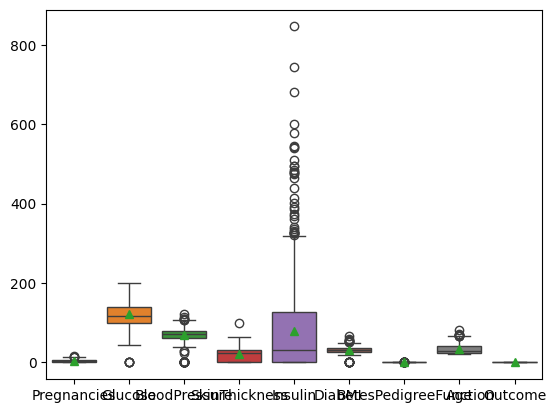

In [5]:
sns.boxplot(data=df,showmeans=True)

In [8]:
min_threshold, max_threshold = df['Insulin'].quantile([0.001,0.999])
min_threshold,max_threshold

(0.0, 767.7660000000062)

In [12]:
df[df['Insulin'] > max_threshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


Thus, there is only one outlier

In [18]:
df =df [ df['Insulin'] < max_threshold]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
X=df.drop(['Outcome'],axis='columns')
y=df['Outcome']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_model= BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score,train_test_split
scores=cross_val_score(bag_model,X,y,cv=5)
scores.mean()

0.7627960275019099

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
bag_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=42)

In [24]:
bag_model.score(X_test,y_test)

0.7575757575757576

## Heart Failure Prediction

In [25]:
import pandas as pd
import seaborn as sns

In [26]:
df=pd.read_csv('/content/drive/MyDrive/ML tutorials/Bagging/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [27]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

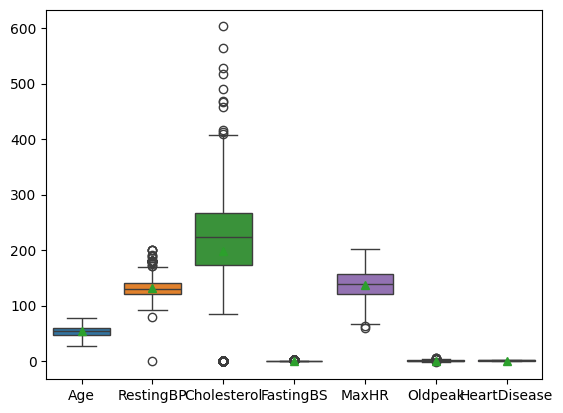

In [29]:
sns.boxplot(data=df,showmeans=True)

The column **Cholesterol** seems to have outliers which needs treatment

In [45]:
df['RestingBP'].quantile([0.001,0.999])

0.001     73.36
0.999    200.00
Name: RestingBP, dtype: float64

In [47]:
df[(df['RestingBP'] > 200.00) | (df['RestingBP'] < 73.36)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Seems like there are no extreme values that lie beyond the maximum and minimum thresholds

In [41]:
categorical_columns= [i for i in df.columns if df[i].dtypes == "object"]
categorical_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [43]:
for i in categorical_columns:
  print(f"{i} \t {df[i].unique()}")

Sex 	 ['M' 'F']
ChestPainType 	 ['ATA' 'NAP' 'ASY' 'TA']
RestingECG 	 ['Normal' 'ST' 'LVH']
ExerciseAngina 	 ['N' 'Y']
ST_Slope 	 ['Up' 'Flat' 'Down']


In [52]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe=OrdinalEncoder()
le=LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['ChestPainType']= le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']= le.fit_transform(df['ExerciseAngina'])
df[['RestingECG']]= oe.fit_transform(df[['RestingECG']])
df[['ST_Slope']]= oe.fit_transform(df[['ST_Slope']])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df[['RestingBP']] = scaler.fit_transform(df[['RestingBP']])
df[['Cholesterol']] = scaler.fit_transform(df[['Cholesterol']])
df[['MaxHR']] = scaler.fit_transform(df[['MaxHR']])
df[['Oldpeak']] = scaler.fit_transform(df[['Oldpeak']])

In [58]:
X=df.drop(['HeartDisease'],axis='columns')
y=df['HeartDisease']

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=42)

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score

scores=cross_val_score(bag,X,y,cv=5)
scores.mean()

0.8147303397481587

In [61]:
from sklearn.model_selection import GridSearchCV

bag= GridSearchCV(BaggingClassifier(estimator=DecisionTreeClassifier(),oob_score=True),{
    'n_estimators':[10,20,50,100],
    'max_samples':[0.2,0.4,0.6,0.8]
},cv=5,return_train_score=False)

In [62]:
bag.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few e

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         oob_score=True),
             param_grid={'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [10, 20, 50, 100]})

In [63]:
print(bag.best_params_)
print(bag.best_score_)

{'max_samples': 0.2, 'n_estimators': 100}
0.8267165597529104


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [66]:
bag.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few e

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         oob_score=True),
             param_grid={'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [10, 20, 50, 100]})

In [67]:
bag.score(X_test,y_test)

0.8695652173913043